In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from funciones_auxiliares import embeber_datos2, cargar_corpus, cargar_modelo, sigmoide_np

corpus, vocab, vocab_size, word_to_idx, idx_to_word = cargar_corpus("corpus.txt", "corpus")
W1, W2, N, C, eta = cargar_modelo("pesos_cbow_pcshavak-c_epoca1600.npz", "relevant_weights") # MEJOR HASTA EL MOMENTO
x_train, y_train = embeber_datos2(corpus, W1, word_to_idx, 10)

# "Escalar" los datos del modelo
x_train = sigmoide_np(x_train)
y_train = sigmoide_np(y_train)

# Datos de entrenamiento
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

input_size = x_train.shape[1]
output_size = y_train.shape[1]

# Definición del modelo
model = Sequential()
model.add(Dense(128, input_shape=(input_size,), activation='gelu'))
model.add(Dense(64, activation='gelu'))
model.add(Dense(output_size, activation='sigmoid'))

# Compilación
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mse',
              metrics=['mae'])

Tamaño de corpus: 310347
Tamaño de vocabulario: 27971
Total de pares válidos: 310186
Contextos únicos: 309015
x_train shape: (310186, 1000)
y_train shape: (310186, 100)


c:\entornos-gpu\aprendizaje-automatico-avanzado\nlp-env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.1303 - mae: 0.3199
Epoch 2/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 0.1300 - mae: 0.3193
Epoch 3/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.1297 - mae: 0.3188
Epoch 4/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - loss: 0.1294 - mae: 0.3183
Epoch 5/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 0.1291 - mae: 0.3177
Epoch 6/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.1289 - mae: 0.3172
Epoch 7/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 0.1286 - mae: 0.3166
Epoch 8/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 0.1283 - mae: 0.3161
Epoch 9/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 0.1281 - mae: 0.3156
Epoch 10/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1278 - mae: 0.3151
Epoch 11/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 0.1275 - mae: 0.3146
Epoch 12/20
19387/19387 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms

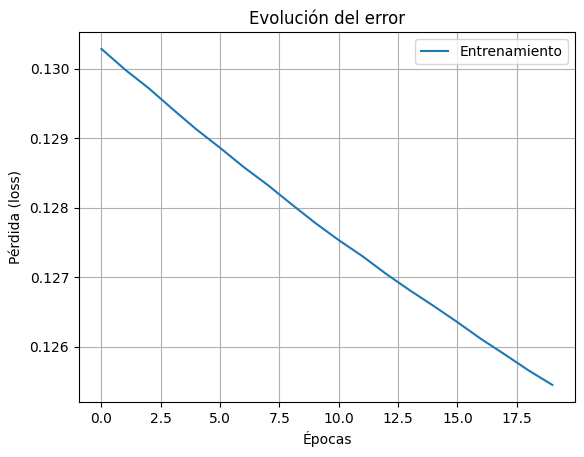

In [4]:
# Entrenamiento
historia = model.fit(x_train, y_train, batch_size=16, epochs=20)

# Gráfico de la pérdida
plt.plot(historia.history['loss'], label='Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (loss)')
plt.title('Evolución del error')
plt.legend()
plt.grid()
plt.show()

# Guardar el modelo entrenado
model.save("modelo_pmc.keras")

In [ ]:
from keras.models import load_model

model = load_model("modelo_pmc.keras")

In [5]:
import numpy as np

def evaluar_modelo(model, x, y):
    """
    Calcula el error de un modelo Keras en los datos x, y.
    Devuelve MSE y MAE promedio.
    """
    y_pred = model.predict(x, batch_size=32, verbose=0)
    mse = np.mean((y - y_pred) ** 2)
    mae = np.mean(np.abs(y - y_pred))
    return mse, mae

mse_train, mae_train = evaluar_modelo(model, x_train, y_train)
print(f"Error en x_train: MSE={mse_train:.6f}, MAE={mae_train:.6f}")

Error en x_train: MSE=0.124251, MAE=0.308447
